
### EXP1-Social SPM maps

#### *Preprocessing:*
- Niak preprocessed SOCIAL task (new scrub method)

#### *run  SPM-Maps separetly for each trial:*

```
   Mental interaction
   Random interaction
  
```

In [35]:
from nilearn import plotting
import os
import numpy as np
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
import nibabel as nib

In [36]:
%matplotlib inline

In [37]:
# Set path
path_root = "/home/yassinebha/Drive/HCP/"
path_rmaps = os.path.join(path_root,"subtypes_scores/26-10-2016/hcp_social_mental_activation_maps_04-May-2017/group_maps/")
rmaps_file_pattern = "{}.nii.gz"

In [38]:
# get networks names
trial_names = [f[:-7] for f in os.listdir(path_rmaps)]
trial_names 

['rnd', 'mental']

# Social Vs Baseline

(53, 64, 52) is the shape of for trial:  rnd
Min = -26.146; Max = 46.177


/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


(53, 64, 52) is the shape of for trial:  mental
Min = -28.229; Max = 52.251
SPM map from HCP Paper


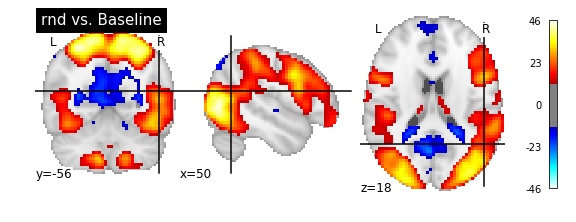

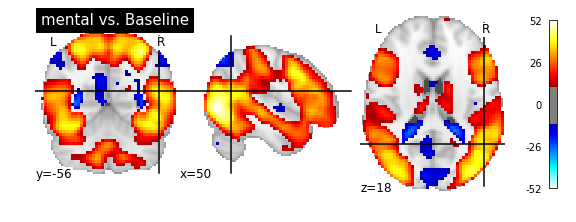

In [39]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= 12,
                                     cut_coords=(50,-56, 18),
                                     title= "%s vs. Baseline" % trial
                                    )
from IPython.display import Image
print ("SPM map from HCP Paper")
Image(url= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4011498/bin/nihms569034f9.jpg")

SPM map for mental trial


/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


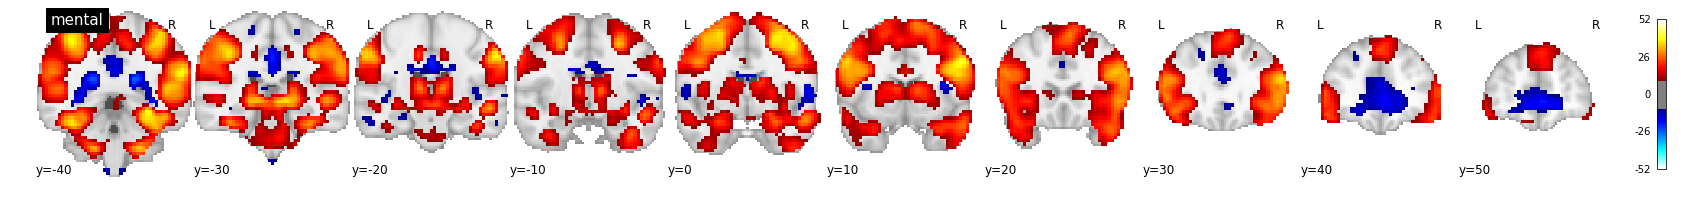

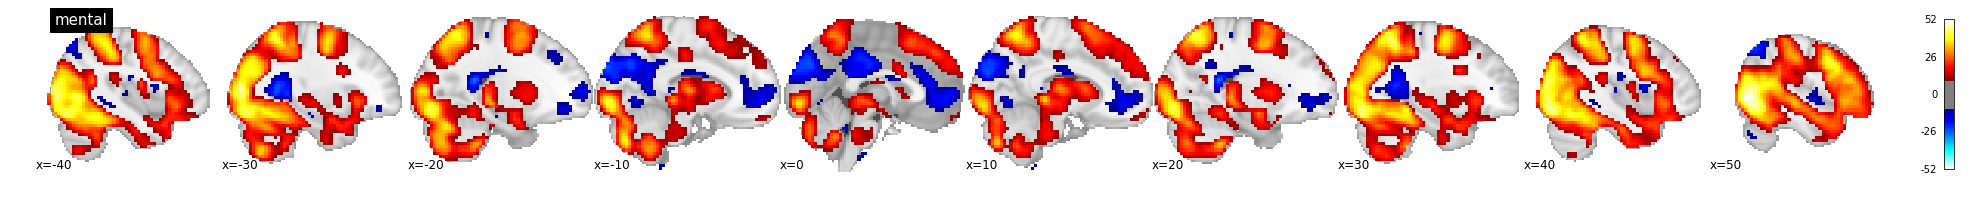

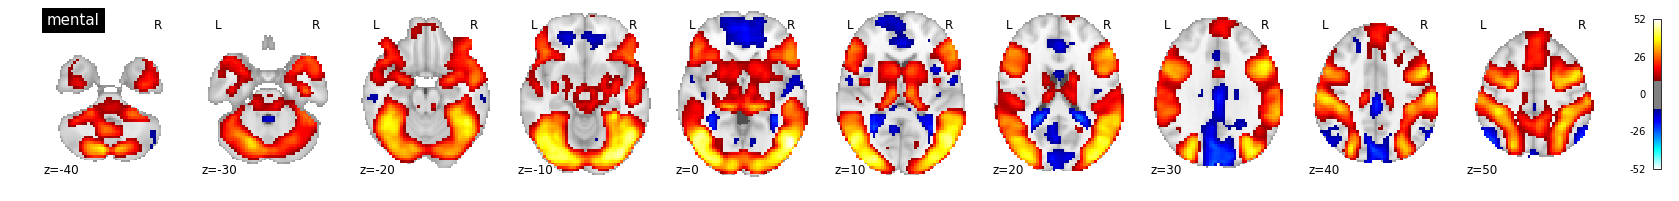

In [40]:
    print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 10,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )


# Social vs. Random

/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.4/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


SPM map from HCP Paper


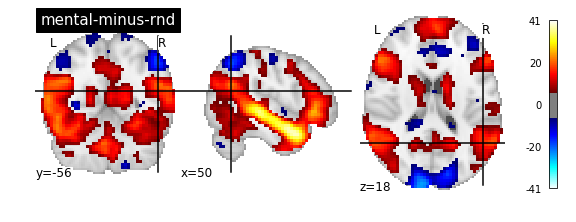

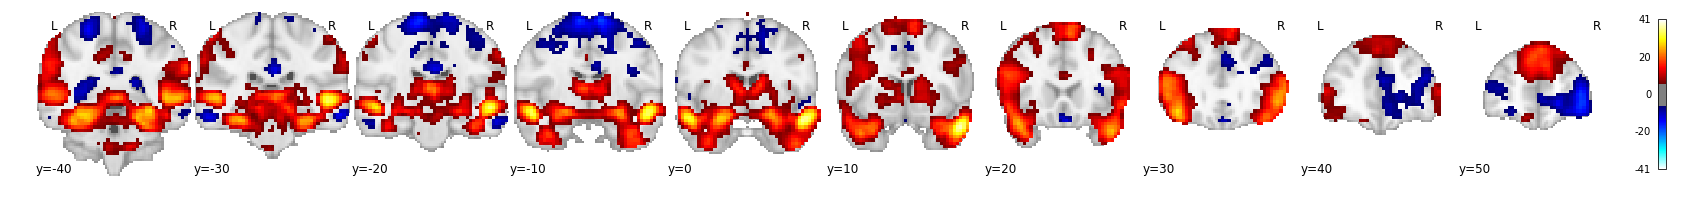

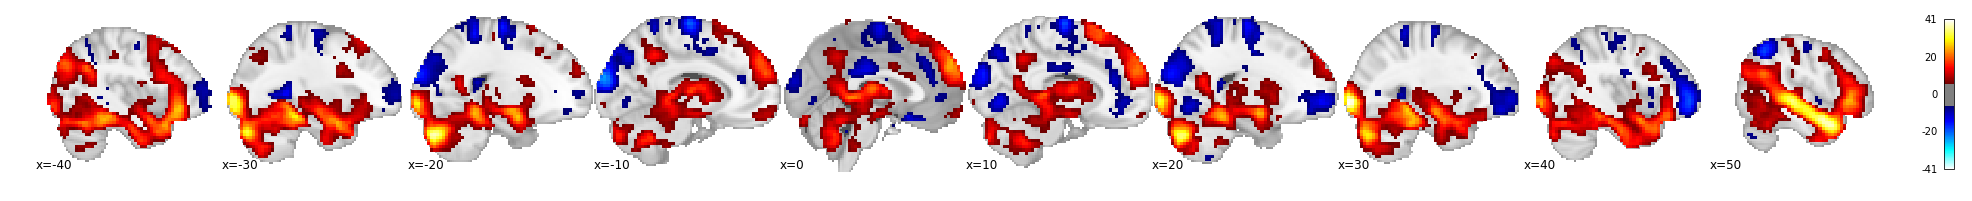

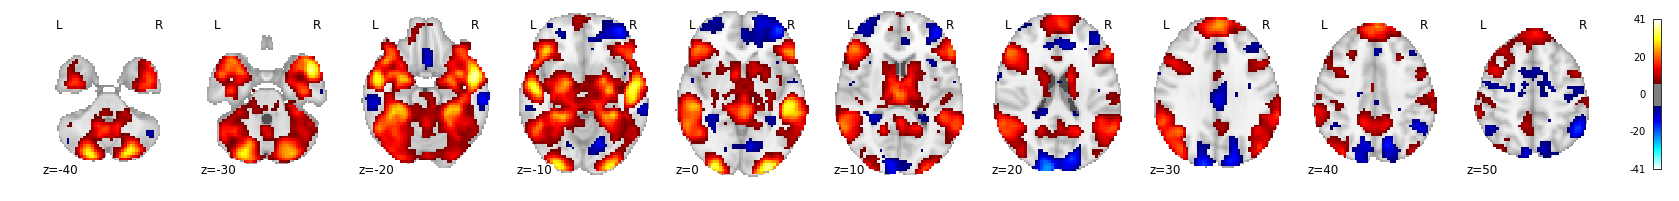

In [41]:
# display map difference rnd - mental

in_vol_rnd = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("rnd")))
in_vol_mental = nib.load(os.path.join(path_rmaps, rmaps_file_pattern.format("mental")))
in_mental_minus_rnd = in_vol_mental.get_data() - in_vol_rnd.get_data()
in_vol_mental_minus_rnd = nib.Nifti1Image(in_mental_minus_rnd, 
                                          affine=in_vol_mental.affine, 
                                          header=in_vol_mental.header
                                         )
nib.save(in_vol_mental_minus_rnd, os.path.join(path_rmaps,'mental_minus_rnd.nii.gz'))
display = plotting.plot_stat_map(in_vol_mental_minus_rnd, threshold= 6,
                                 cut_coords=(50,-56, 18),
                                 title= "mental-minus-rnd"
                                 )
display = plotting.plot_stat_map(in_vol_mental_minus_rnd, threshold= 6,
                                 display_mode='y',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_mental_minus_rnd, threshold=6,
                                 display_mode='x',
                                 cut_coords= range(-40, 60, 10),
                                )
display = plotting.plot_stat_map(in_vol_mental_minus_rnd, threshold=6,
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10),
                                )
from IPython.display import Image
print ("SPM map from HCP Paper")
Image(url= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4011498/bin/nihms569034f9.jpg")